In [57]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AffinityPropagation

punctuation_map = dict((ord(char), None) for char in string.punctuation)
stemmer = nltk.stem.snowball.EnglishStemmer()
# nltk.download('punkt')
def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize)

def get_clusters(sentences):
    tf_idf_matrix = vectorizer.fit_transform(sentences)
    similarity_matrix = (tf_idf_matrix * tf_idf_matrix.T).A
    affinity_propagation = AffinityPropagation(affinity="precomputed", damping=0.5)
    affinity_propagation.fit(similarity_matrix)

    labels = affinity_propagation.labels_
    cluster_centers = affinity_propagation.cluster_centers_indices_

    tagged_sentences = zip(sentences, labels)
    clusters = {}

    for sentence, cluster_id in tagged_sentences:
        clusters.setdefault(sentences[cluster_centers[cluster_id]], []).append(sentence)

    return clusters

with open('allfields.txt',encoding="utf8") as f:
    sentences = f.readlines()
    #print (sentences)

clusters = get_clusters(sentences)

for cluster in clusters:
    #get_clusters(clusters[cluster])
    print(cluster, ':')
    for element in clusters[cluster]:
        print('  - ', element)
        
        
        #print (clusters[cluster])
    #clusters1=get_clusters(cluster)  

Issue	Server/Network - Auto Ticket	SSO-WINTEL-RHYTHM				vil_delunify  Implement the Remedy application/Remedy server/Production
 :
  -  Issue	Server/Network - Auto Ticket	SSO-WINTEL-RHYTHM				vil_delunify  Implement the Remedy application/Remedy server/Production

  -  Issue	Server/Network - Auto Ticket	SSO-WINTEL-RHYTHM				vil_delunify  Implement the Remedy application/Remedy server/Production

  -  Issue	Server/Network - Auto Ticket	SSO-WINTEL-RHYTHM				vil_delunify  Implement the Remedy application/Remedy server/Production

  -  Issue	Server/Network - Auto Ticket	SSO-WINTEL-RHYTHM				vil_delunify  Implement the Remedy application/Remedy server/Production

  -  Issue	Server/Network - Auto Ticket	SSO-WINTEL-RHYTHM				vil_delunify  Implement the Remedy application/Remedy server/Production

						TBO-HPAPM-CRM P1
 :
  -  						TBO-HPAPM-CRM P1

  -  						TBO-HPAPM-CRM P1

  -  						TBO-HPAPM-CRM P1

  -  						TBO-HPAPM-CRM P1

Issue	Server/Network - Auto Ticket	SSO - Alerts - Unix			

In [10]:
import os
print (os.getcwd())

C:\Users\IBM_ADMIN\Desktop


In [3]:
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering, KMeans
import numpy as np
from sklearn.decomposition import TruncatedSVD, PCA
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_file
import nltk
import gensim
import string
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import re
from sklearn.metrics.pairwise import cosine_similarity
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.metrics.pairwise import euclidean_distances
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import defaultdict
import math
from scipy.spatial import distance
import json

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

lemmatiser = WordNetLemmatizer()


output_file("test.html")

stemmer = nltk.SnowballStemmer("english")

with open("Shorttexts.txt","r") as f:
	input_text = f.readlines()
f.close()

input_data = []


def tokenize(text):
    lemmatized_words = []
    text = text.lower()
    text = text.strip("\n")
    text = re.sub(r'\\n',' ',text)
    text = re.sub(r'[^\w\s]',' ',text)
    tokens = nltk.word_tokenize(text)
    tokens_pos = pos_tag(tokens)
    count = 0
    for token in tokens:
        pos = tokens_pos[count]
        pos = get_wordnet_pos(pos[1])
        if pos != '':
            lemma = lemmatiser.lemmatize(token, pos)
        else:
            lemma = lemmatiser.lemmatize(token)
        lemmatized_words.append(lemma)
        count+=1
    return lemmatized_words


for row in input_text:
    row = row.strip("\n")
    input_data.append(row)

count_vectorizer = CountVectorizer(encoding="latin-1", stop_words="english", tokenizer=tokenize, analyzer='word')
Tfidf_vectorizer = TfidfVectorizer(encoding="latin-1", use_idf=True, stop_words="english", tokenizer=tokenize, analyzer='word')
vectorizer = TfidfVectorizer(encoding="latin-1", use_idf=True, stop_words="english", tokenizer=tokenize, analyzer='word')
input_freq = Tfidf_vectorizer.fit_transform(input_data).toarray()
input_vector = Tfidf_vectorizer.fit_transform(input_data)

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(input_vector)
clusters = clustering_model.fit_predict(input_vector)

count=1
cluster_text = defaultdict(list)
docs_list =[]

for cluster in clusters:
    print (cluster)

count_data = len(input_data)

for i in range(count_data):
    cluster_id = clusters[i]
    doc_id = i+1
    cluster_text[cluster_id].append(doc_id)

cluster_terms = defaultdict(list)

print("Top terms per cluster:")
centroids = clustering_model.cluster_centers_
order_centroids = centroids.argsort()[:, ::-1]
terms = Tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :50]:
        print (' %s' % terms[ind],)
        cluster_terms[i].append((ind,terms[ind]))
    print ()

cluster_freq = defaultdict(dict)


for cluster_id, terms in cluster_terms.items():
    doc_list = cluster_text[cluster_id]
    term_freq = defaultdict(int)
    for (index, word) in terms:
        term_count = 0
        for doc in doc_list:
            doc_id = doc - 1
            term_count+= input_freq[doc_id][index]
        term_freq[word] = term_count
    cluster_freq[cluster_id] = term_freq

with open('cluster_freq.json', 'w') as f:
    json.dump(cluster_freq, f)


answers = defaultdict(list)
for i in range(num_clusters):
    #print "Cluster %d:" % i
    doc_list = cluster_text[i]
    #print doc_list
    distances = []
    for doc in doc_list:
        doc_id = doc - 1
        doc_vector = input_vector[doc_id]
        v1 = np.array(centroids[i])
        v2 = np.array(doc_vector.toarray())
        distances.append((doc, distance.euclidean(v1, v2)))

    distances.sort(key = itemgetter(1))
    count = len(distances)
    #print count
    doc_id, dis = distances[0]
    answers[i].append(('best',input_data[doc_id-1]))
    doc_id, dis = distances[1]
    answers[i].append(('best',input_data[doc_id-1]))

    doc_id, dis = distances[count-1]
    answers[i].append(('worst', input_data[doc_id-1]))
    doc_id, dis = distances[count-2]
    answers[i].append(('worst',input_data[doc_id-1] ))



with open("answers.txt" , "w") as f:
    for answers in answers.values():
        for answer in answers:
            output = answer[1] + "\n"
            f.write(output)






C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


1
3
4
2
1
1
2
3
3
0
3
4
0
3
0
0
4
4
1
3
2
2
2
0
0
0
0
0
2
4
4
3
1
2
4
3
Top terms per cluster:
Cluster 0:
 movement
 ball
 leg
 output
 final
 foot
 meet
 actual
 juggle
 actually
 balance
 body
 pathway
 position
 coordinate
 soccer
 lift
 force
 produce
 hip
 right
 posture
 contact
 left
 stabilization
 control
 contraction
 accommodates
 form
 action
 adaptation
 adjustment
 fine
 efferent
 allow
 immediate
 deliver
 appropriate
 cord
 brain
 command
 connection
 tuning
 lot
 information
 reflexes
 surrounding
 spinal
 significant
 signal

Cluster 1:
 motor
 command
 reflex
 response
 modify
 tune
 adjustment
 appropriate
 relay
 fine
 final
 muscle
 foot
 efferent
 tuning
 cord
 force
 form
 hip
 immediate
 information
 input
 deliver
 contraction
 coordinate
 control
 left
 contact
 connection
 brain
 body
 ball
 balance
 allow
 adaptation
 actually
 actual
 action
 accommodates
 juggle
 lot
 leg
 level
 surrounding
 stabilization
 spinal
 soccer
 significant
 signal
 sensory

Cl

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [18]:
pip install -U gensim

SyntaxError: invalid syntax (<ipython-input-18-f5f8ef1837f1>, line 1)

In [20]:
import gensim

C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [23]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\IBM_ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\IBM_ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\IBM_ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\IBM_ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\IBM_ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\IBM_ADMIN\AppData\Roa

False

In [5]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [6]:
# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [8]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [10]:
with open('field11.txt',encoding="utf8") as f:
    sentences = f.readlines()

In [12]:
for line in sentences:
    print (line.encode('utf-8').rstrip())

b'\xef\xbb\xbfVodafone India'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Business Application'
b'Central Application - cPOS'
b'Central Application - cPOS'
b'Central Application- m-pesa'
b'Inmation'
b'I

In [15]:
stopwords = nltk.corpus.stopwords.words('english')

In [17]:
print (stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']


In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [19]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.0, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_only, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(sentences) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

Wall time: 286 ms
(917, 19)


In [22]:
terms = tfidf_vectorizer.get_feature_names()

In [23]:
print (terms)

['application', 'application cpos', 'application-', 'application- m-pesa', 'business', 'business application', 'central', 'central application', 'central application cpos', 'central application-', 'central application- m-pesa', 'cpos', 'india', 'inmation', 'issue', 'm-pesa', 'request', '\ufeffvodafone', '\ufeffvodafone india']


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print(dist)

[[-0.  1.  1. ...,  1.  1.  1.]
 [ 1. -0. -0. ...,  1.  1.  1.]
 [ 1. -0. -0. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]]


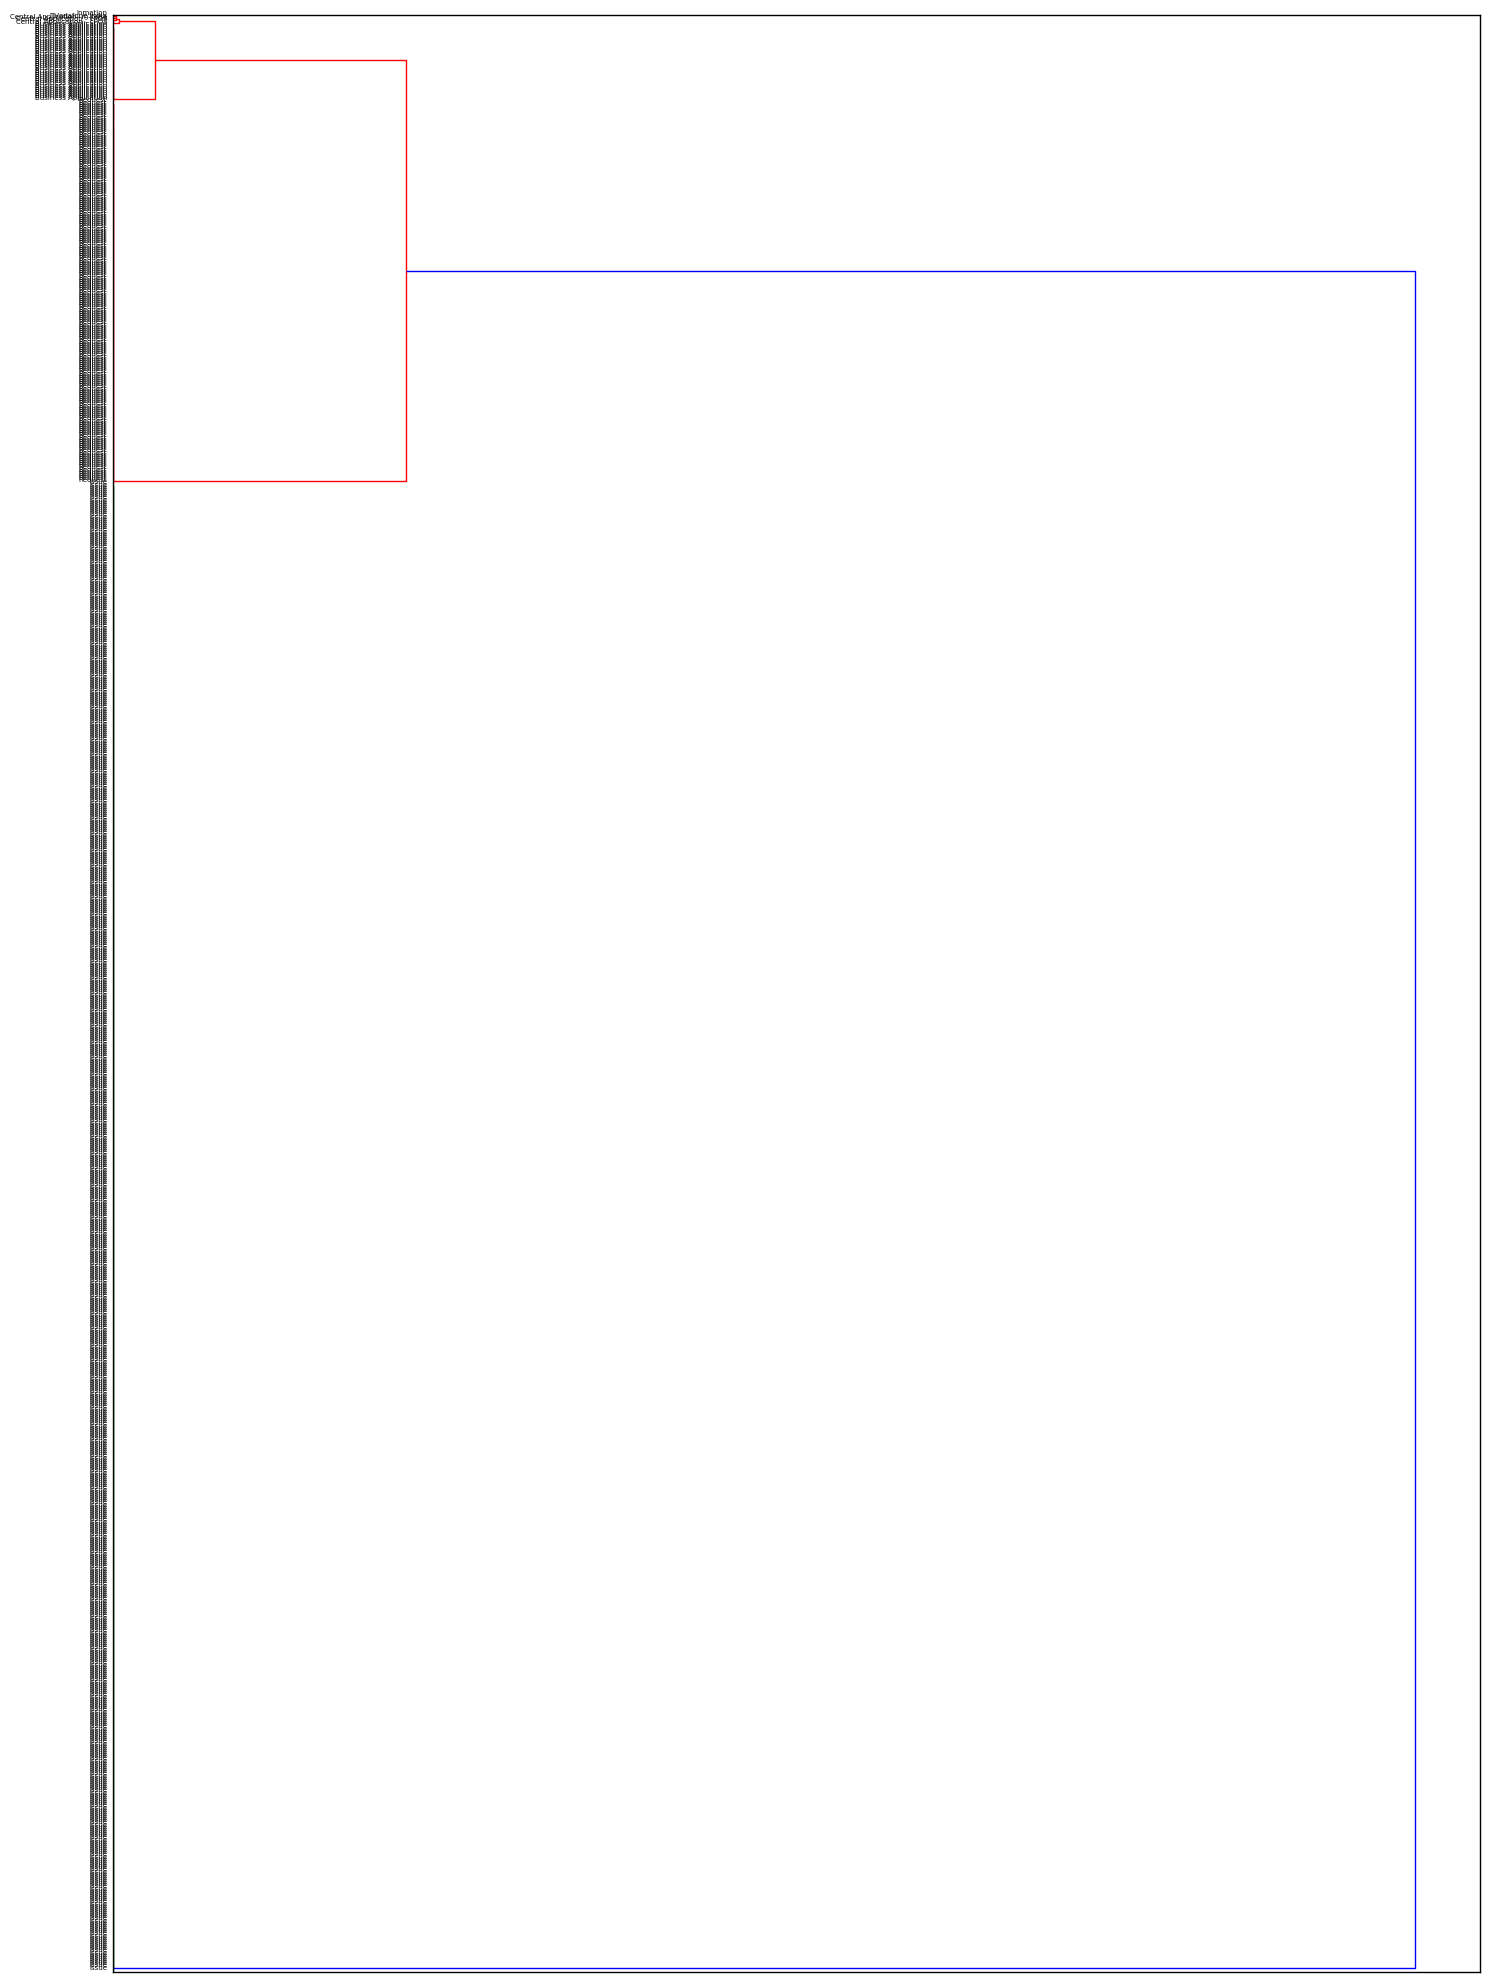

In [28]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=sentences);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [29]:
linkage_matrix[:20]

array([[  37.,   38.,    0.,    2.],
       [   1.,    2.,    0.,    2.],
       [   3.,  918.,    0.,    3.],
       [   4.,  919.,    0.,    4.],
       [   5.,  920.,    0.,    5.],
       [   6.,  921.,    0.,    6.],
       [   7.,  922.,    0.,    7.],
       [   8.,  923.,    0.,    8.],
       [   9.,  924.,    0.,    9.],
       [  10.,  925.,    0.,   10.],
       [  11.,  926.,    0.,   11.],
       [  12.,  927.,    0.,   12.],
       [  13.,  928.,    0.,   13.],
       [  14.,  929.,    0.,   14.],
       [  15.,  930.,    0.,   15.],
       [  16.,  931.,    0.,   16.],
       [  17.,  932.,    0.,   17.],
       [  18.,  933.,    0.,   18.],
       [  19.,  934.,    0.,   19.],
       [  20.,  935.,    0.,   20.]])

In [32]:
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
fc=fcluster(linkage_matrix,1)

In [33]:
fc

array([4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,